# Pythonで微分方程式を解く．

Pythonの基礎とGoogle Colabの使い方は[このサイト](https://www.python.jp/train/index.html)を読んで理解しましょう．

## オイラー法
微分方程式を解くとは積分することだとも言えます．計算機で積分していけば解けます．どのように積分していくかというと，高校のときに習った区分求積法を使います．オイラー法は単純に区分求積法をしていると言えます．$h$ごとに微分の値を足していくとしましょう．そうすると，$i$回計算した次の値は

$f(x_{i+1}) = f(x_i) + h \frac{df(x)}{dx}|_{x_i}$

この式を使えば，任意の$x_i=x_0+ih$のときの$f(x_i)$値が求まります．例として,

$y =f(x), y' = \frac{df(x)}{dx} = x , f(0) = 0$

を解いてみます．

In [ ]:
# 計算を楽にしてくれるライブラリを読み込み
import numpy as np

# 微分方程式の定義
def df(x):
  return(x)

# Euler法
def Euler(x, y, h):
  y = y + h * df(x)
  return y

# main関数
def main():
  h = 0.1  #刻み値
  x_0 = 0 #初期値
  x_end = 10 #x=10まで計算してみる．
  y = 0 #初期化

  for x in np.arange(x_0, x_end, h):
    y = Euler(x, y, h)
    print(x+h, y)


if __name__ == "__main__":
    main()

0.1 0.0
0.2 0.010000000000000002
0.30000000000000004 0.030000000000000006
0.4 0.06000000000000001
0.5 0.10000000000000002
0.6 0.15000000000000002
0.7000000000000001 0.21000000000000002
0.8 0.28
0.9 0.36000000000000004
1.0 0.45000000000000007
1.1 0.55
1.2000000000000002 0.66
1.3000000000000003 0.78
1.4000000000000001 0.91
1.5000000000000002 1.05
1.6 1.2000000000000002
1.7000000000000002 1.3600000000000003
1.8000000000000003 1.5300000000000002
1.9000000000000001 1.7100000000000002
2.0 1.9000000000000001
2.1 2.1
2.2 2.31
2.3000000000000003 2.5300000000000002
2.4000000000000004 2.7600000000000002
2.5000000000000004 3.0000000000000004
2.6 3.2500000000000004
2.7 3.5100000000000007
2.8000000000000003 3.7800000000000007
2.9000000000000004 4.0600000000000005
3.0000000000000004 4.3500000000000005
3.1 4.65
3.2 4.960000000000001
3.3000000000000003 5.280000000000001
3.4000000000000004 5.610000000000001
3.5000000000000004 5.950000000000001
3.6 6.300000000000001
3.7 6.660000000000001
3.80000000000000

この微分方程式の解は$y = x^2/2$です．先のコードを実行すると，おおよそ解と同じ結果が得られます．Euler法は精度が良くないので同じ値になりません．このコードでは$x=10$のとき$y=49.5$となっていますが，本当は50です．

## 結果をグラフで表示してみる．

Euler法を使って，微分方程式のおおよその解が得られることが分かりました．しかし，先のコードでは数字の羅列が計算で出てきただけです．数字の羅列でも良いのですが，人間にはわかりにくいです．そこで，計算結果をグラフにしてみます．グラフを作成するコードは次のようになります．

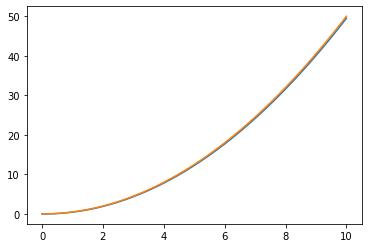

In [ ]:
# 計算を楽にしてくれるライブラリを読み込み
import numpy as np
# グラフを描くライブラリを読み込み
import matplotlib.pyplot as plt

# 微分方程式の定義
def df(x):
  return(x)

# Euler法
def Euler(x, y, h):
  y = y + h * df(x)
  return y

# main関数
def main():
  h = 0.1       #刻み値
  x_0 = 0       #初期値
  N = 100       #計算する回数．
  x_end = h * N #x=10まで計算してみる．

  x = np.arange(x_0, x_end + h, h) #x=0からx=100までの数(h刻み)をxに代入
  y = np.zeros(x.size)             #xの個数分yを用意（0で初期化）
  y[0] = 0                         #yの初期値を代入

  for i in range(x.size-1):
    y[i+1] = Euler(x[i], y[i], h)

  plt.plot(x, y)      #横軸x縦軸yの線グラフを描く
  plt.plot(x, x**2/2) #解析解のグラフを描く
  plt.show()          #グラフの表示

if __name__ == "__main__":
    main()

これでグラフもかけました．結果を変数に保存するために，最初のコードより複雑になっています．面倒ですが慣れるしか無いですね．

このコードを改変すれば，様々な微分方程式を解くことができます．練習として解析的に解ける微分方程式をEuler法で解いてみると良いでしょう．